# Esercizi 11 - Neural network regression

## 11.2 - Polinomio

Considero ora il polinomio
$$
f(x)=4-3x-2x^2+3x^3
$$
in $x \in [-1,1]$.

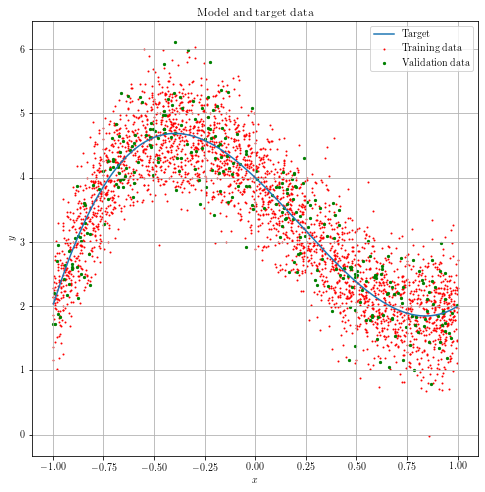

In [109]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.layers import LeakyReLU



# Ho avuto dei problemi a far funzionare tensorflow utilizzando più layer su jupyter,
# https://stackoverflow.com/questions/53014306/error-15-initializing-libiomp5-dylib-but-found-libiomp5-dylib-already-initial
# Ho utilizzato la soluzione trovata in quel link, non ho la più pallida idea di cosa sia ma funziona
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'


def f(x):
    return 4-3*x-2*x**2+3*x**3

ntrain=3000
nvalid=300

# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1, 1, ntrain)
x_valid = np.random.uniform(-1, 1, nvalid)
x_valid.sort()
y_target = f(x_valid) # ideal (target) linear function

sigma = 0.5 # noise standard deviation
y_train = np.random.normal(f(x_train), sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(f(x_valid), sigma)


# plot training and target dataset
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.figure(figsize=(8,8))
plt.plot(x_valid, y_target, label="Target")
plt.title("Model and target data")
plt.xlabel(r"$x$")
plt.ylabel(r"$y$")
plt.scatter(x_train, y_train, color='r', s=1, label="Training data")
plt.scatter(x_valid, y_valid, color='g',s=5, label="Validation data")
plt.grid(True); 
plt.legend()
plt.show()

Ho provato quindi a considerare diversi modelli di NN.

## Complessità

Ho inizialmente cercato di capire quanti parametri fosse necessario considerare. Ho quindi considerato vari modelli aggiungendo via via layer di 4 neuroni per osservare l'andamento della bontà del modello in funzione della complessità. Come funzioni di attivazione ho considerato delle leaky ReLU: ho notato che le ReLU normali a volte davano qualche problema di convergenza della rete. Ho ipotizzato che in alcuni casi con le ReLU potrebbero emergere dei problemi dato che annulla completamente i valori negativi, ma ovviamente non sono sicuro di questa ipotesi.

In [110]:
def createModel(ncentral_layers):
    model = tf.keras.Sequential()
    model.add(Dense(4, input_shape=(1,)))
    model.add(LeakyReLU(alpha=0.1))
    for i in range(ncentral_layers):
        #model.add(Dense(4, activation='relu'))
        model.add(Dense(4))
        model.add(LeakyReLU(alpha=0.1))
    model.add(Dense(1))
    return model


model_array = [createModel(n) for n in range(8)]

for model in model_array:
    # compile the model choosing optimizer, loss and metrics objects
    model.compile(optimizer='sgd', loss='mse', metrics=['mse'])
    model.summary()


Model: "sequential_190"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1233 (Dense)           (None, 4)                 8         
_________________________________________________________________
leaky_re_lu_178 (LeakyReLU)  (None, 4)                 0         
_________________________________________________________________
dense_1234 (Dense)           (None, 1)                 5         
Total params: 13
Trainable params: 13
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_191"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1235 (Dense)           (None, 4)                 8         
_________________________________________________________________
leaky_re_lu_179 (LeakyReLU)  (None, 4)                 0         
________________________________

In [111]:
history_array = [model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=30,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid)) for model in model_array]

Train on 3000 samples, validate on 300 samples
Epoch 1/30
3000/3000 [==============================] - 1s 258us/sample - loss: 2.8889 - mse: 2.8889 - val_loss: 0.7815 - val_mse: 0.7815
Epoch 2/30
3000/3000 [==============================] - 0s 75us/sample - loss: 0.7221 - mse: 0.7221 - val_loss: 0.7293 - val_mse: 0.7293
Epoch 3/30
3000/3000 [==============================] - 0s 83us/sample - loss: 0.6781 - mse: 0.6781 - val_loss: 0.6917 - val_mse: 0.6917
Epoch 4/30
3000/3000 [==============================] - 0s 74us/sample - loss: 0.6479 - mse: 0.6479 - val_loss: 0.6595 - val_mse: 0.6595
Epoch 5/30
3000/3000 [==============================] - 0s 96us/sample - loss: 0.6184 - mse: 0.6184 - val_loss: 0.6347 - val_mse: 0.6347
Epoch 6/30
3000/3000 [==============================] - 0s 75us/sample - loss: 0.5940 - mse: 0.5940 - val_loss: 0.6073 - val_mse: 0.6073
Epoch 7/30
3000/3000 [==============================] - 0s 104us/sample - loss: 0.5711 - mse: 0.5711 - val_loss: 0.5840 - val_mse:

Epoch 30/30
3000/3000 [==============================] - 0s 65us/sample - loss: 0.2548 - mse: 0.2548 - val_loss: 0.2390 - val_mse: 0.2390
Train on 3000 samples, validate on 300 samples
Epoch 1/30
3000/3000 [==============================] - 1s 284us/sample - loss: 2.7238 - mse: 2.7238 - val_loss: 0.9455 - val_mse: 0.9455
Epoch 2/30
3000/3000 [==============================] - 0s 71us/sample - loss: 0.7588 - mse: 0.7588 - val_loss: 0.6715 - val_mse: 0.6715
Epoch 3/30
3000/3000 [==============================] - 0s 78us/sample - loss: 0.6033 - mse: 0.6033 - val_loss: 0.5632 - val_mse: 0.5632
Epoch 4/30
3000/3000 [==============================] - 0s 79us/sample - loss: 0.4992 - mse: 0.4992 - val_loss: 0.4690 - val_mse: 0.4690
Epoch 5/30
3000/3000 [==============================] - 0s 72us/sample - loss: 0.3994 - mse: 0.3994 - val_loss: 0.3766 - val_mse: 0.3766
Epoch 6/30
3000/3000 [==============================] - 0s 78us/sample - loss: 0.3387 - mse: 0.3387 - val_loss: 0.3166 - val_mse:

Epoch 29/30
3000/3000 [==============================] - 0s 80us/sample - loss: 0.2596 - mse: 0.2596 - val_loss: 0.2504 - val_mse: 0.2504
Epoch 30/30
3000/3000 [==============================] - 0s 80us/sample - loss: 0.2592 - mse: 0.2592 - val_loss: 0.2519 - val_mse: 0.2519
Train on 3000 samples, validate on 300 samples
Epoch 1/30
3000/3000 [==============================] - 1s 343us/sample - loss: 1.9578 - mse: 1.9578 - val_loss: 0.6128 - val_mse: 0.6128
Epoch 2/30
3000/3000 [==============================] - 0s 81us/sample - loss: 0.5263 - mse: 0.5263 - val_loss: 0.5306 - val_mse: 0.5306
Epoch 3/30
3000/3000 [==============================] - 0s 78us/sample - loss: 0.4796 - mse: 0.4796 - val_loss: 0.4813 - val_mse: 0.4813
Epoch 4/30
3000/3000 [==============================] - 0s 83us/sample - loss: 0.4265 - mse: 0.4265 - val_loss: 0.4124 - val_mse: 0.4124
Epoch 5/30
3000/3000 [==============================] - 0s 84us/sample - loss: 0.3453 - mse: 0.3453 - val_loss: 0.3235 - val_mse

Epoch 28/30
3000/3000 [==============================] - 0s 94us/sample - loss: 0.2710 - mse: 0.2710 - val_loss: 0.2388 - val_mse: 0.2388
Epoch 29/30
3000/3000 [==============================] - 0s 92us/sample - loss: 0.2646 - mse: 0.2646 - val_loss: 0.2652 - val_mse: 0.2652
Epoch 30/30
3000/3000 [==============================] - 0s 84us/sample - loss: 0.2660 - mse: 0.2660 - val_loss: 0.2674 - val_mse: 0.2674
Train on 3000 samples, validate on 300 samples
Epoch 1/30
3000/3000 [==============================] - 1s 410us/sample - loss: 1.9145 - mse: 1.9145 - val_loss: 0.5842 - val_mse: 0.5842
Epoch 2/30
3000/3000 [==============================] - 0s 94us/sample - loss: 0.5275 - mse: 0.5275 - val_loss: 0.5473 - val_mse: 0.5473
Epoch 3/30
3000/3000 [==============================] - 0s 97us/sample - loss: 0.5186 - mse: 0.5186 - val_loss: 0.5553 - val_mse: 0.5553
Epoch 4/30
3000/3000 [==============================] - 0s 88us/sample - loss: 0.5173 - mse: 0.5173 - val_loss: 0.5438 - val_ms

Epoch 27/30
3000/3000 [==============================] - 0s 93us/sample - loss: 0.2582 - mse: 0.2582 - val_loss: 0.2360 - val_mse: 0.2360
Epoch 28/30
3000/3000 [==============================] - 0s 90us/sample - loss: 0.2562 - mse: 0.2562 - val_loss: 0.2364 - val_mse: 0.2364
Epoch 29/30
3000/3000 [==============================] - 0s 96us/sample - loss: 0.2562 - mse: 0.2562 - val_loss: 0.2359 - val_mse: 0.2359
Epoch 30/30
3000/3000 [==============================] - 0s 94us/sample - loss: 0.2590 - mse: 0.2590 - val_loss: 0.2458 - val_mse: 0.2458


Parameters:  13
Test loss (validation data): 0.32556412756443026
Test loss (exact curve): 0.07193710296104351
Parameters:  33
Test loss (validation data): 0.23903621435165406
Test loss (exact curve): 0.004570614158486326
Parameters:  53
Test loss (validation data): 0.2337022919456164
Test loss (exact curve): 0.008951591127552092
Parameters:  73
Test loss (validation data): 0.25190267354249957
Test loss (exact curve): 0.016895703226327895
Parameters:  93
Test loss (validation data): 0.23602354854345323
Test loss (exact curve): 0.0050136386975646015
Parameters:  113
Test loss (validation data): 0.26744607667128245
Test loss (exact curve): 0.0341415777678291
Parameters:  133
Test loss (validation data): 0.2442022156715393
Test loss (exact curve): 0.006553348330780864
Parameters:  153
Test loss (validation data): 0.2457973101735115
Test loss (exact curve): 0.016300786297457914


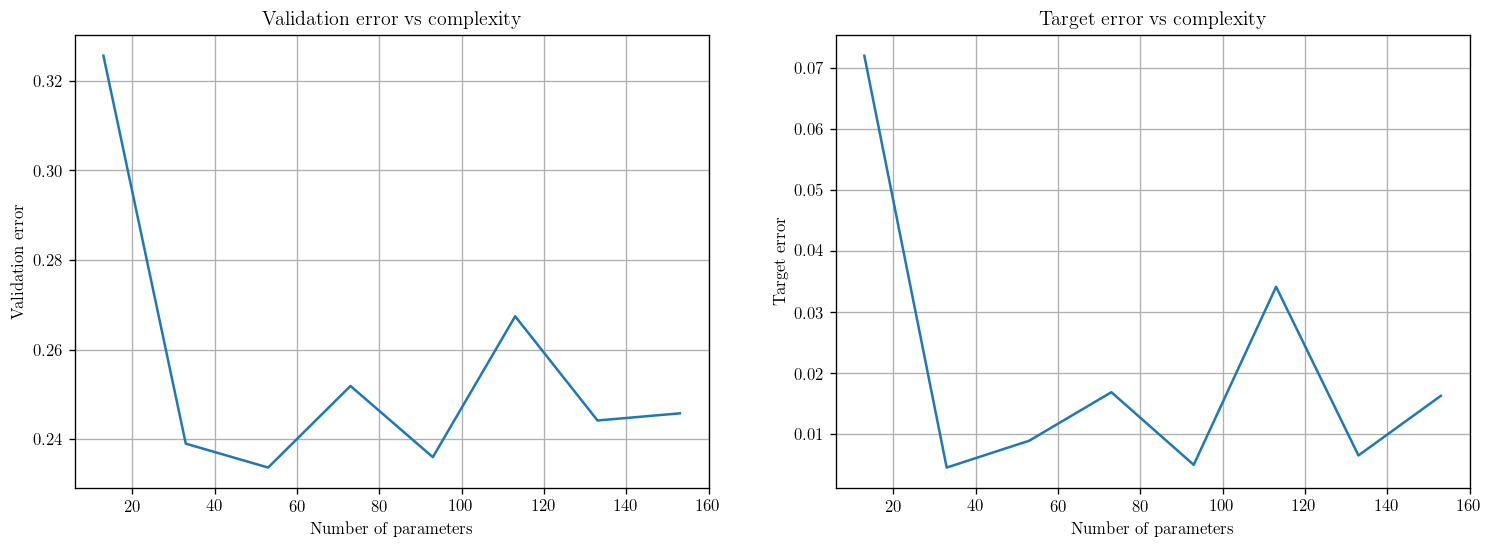

In [112]:
scores_valid = [model.evaluate(x_valid, y_valid, batch_size=32, verbose=0)[0] for model in model_array]
scores_target = [model.evaluate(x_valid, y_target, batch_size=32, verbose=0)[0] for model in model_array]
nparams = [model.count_params() for model in model_array]

fig, (ax1,ax2)=plt.subplots(1,2, figsize=(15,5), dpi=120)
ax1.plot(nparams, scores_valid)
ax1.set_title("Validation error vs complexity")
ax1.set_xlabel("Number of parameters")
ax1.set_ylabel("Validation error")
ax1.grid()

ax2.plot(nparams, scores_target)
ax2.set_title("Target error vs complexity")
ax2.set_xlabel("Number of parameters")
ax2.set_ylabel("Target error")
ax2.grid()

for i in range(len(model_array)):
    print("==============")
    print("Parameters: ", model_array[i].count_params())
    print('Test loss (validation data):', scores_valid[i])
    print('Test loss (exact curve):', scores_target[i])

plt.show()

Se si considerano pochi parametri ho notato che l'errore di validazione è sembra abbastanza alto. Per un numero di parametri maggiore, invece, non sembra esserci grande differenza, a parte in alcuni casi in cui la rete neurale "fatica" un po' di più a convergere rispetto ad altri casi con un numero di parametri simile. Queste osservazioni sono comunque solo qualitative, dato che l'errore di validazione cambia a seconda dei dati casuali e anche in base al training. In ogni caso, sembra che un numero di parametri tra $50$ e $90$ possa essere sufficiente a gestire il fit di questo polinomio.

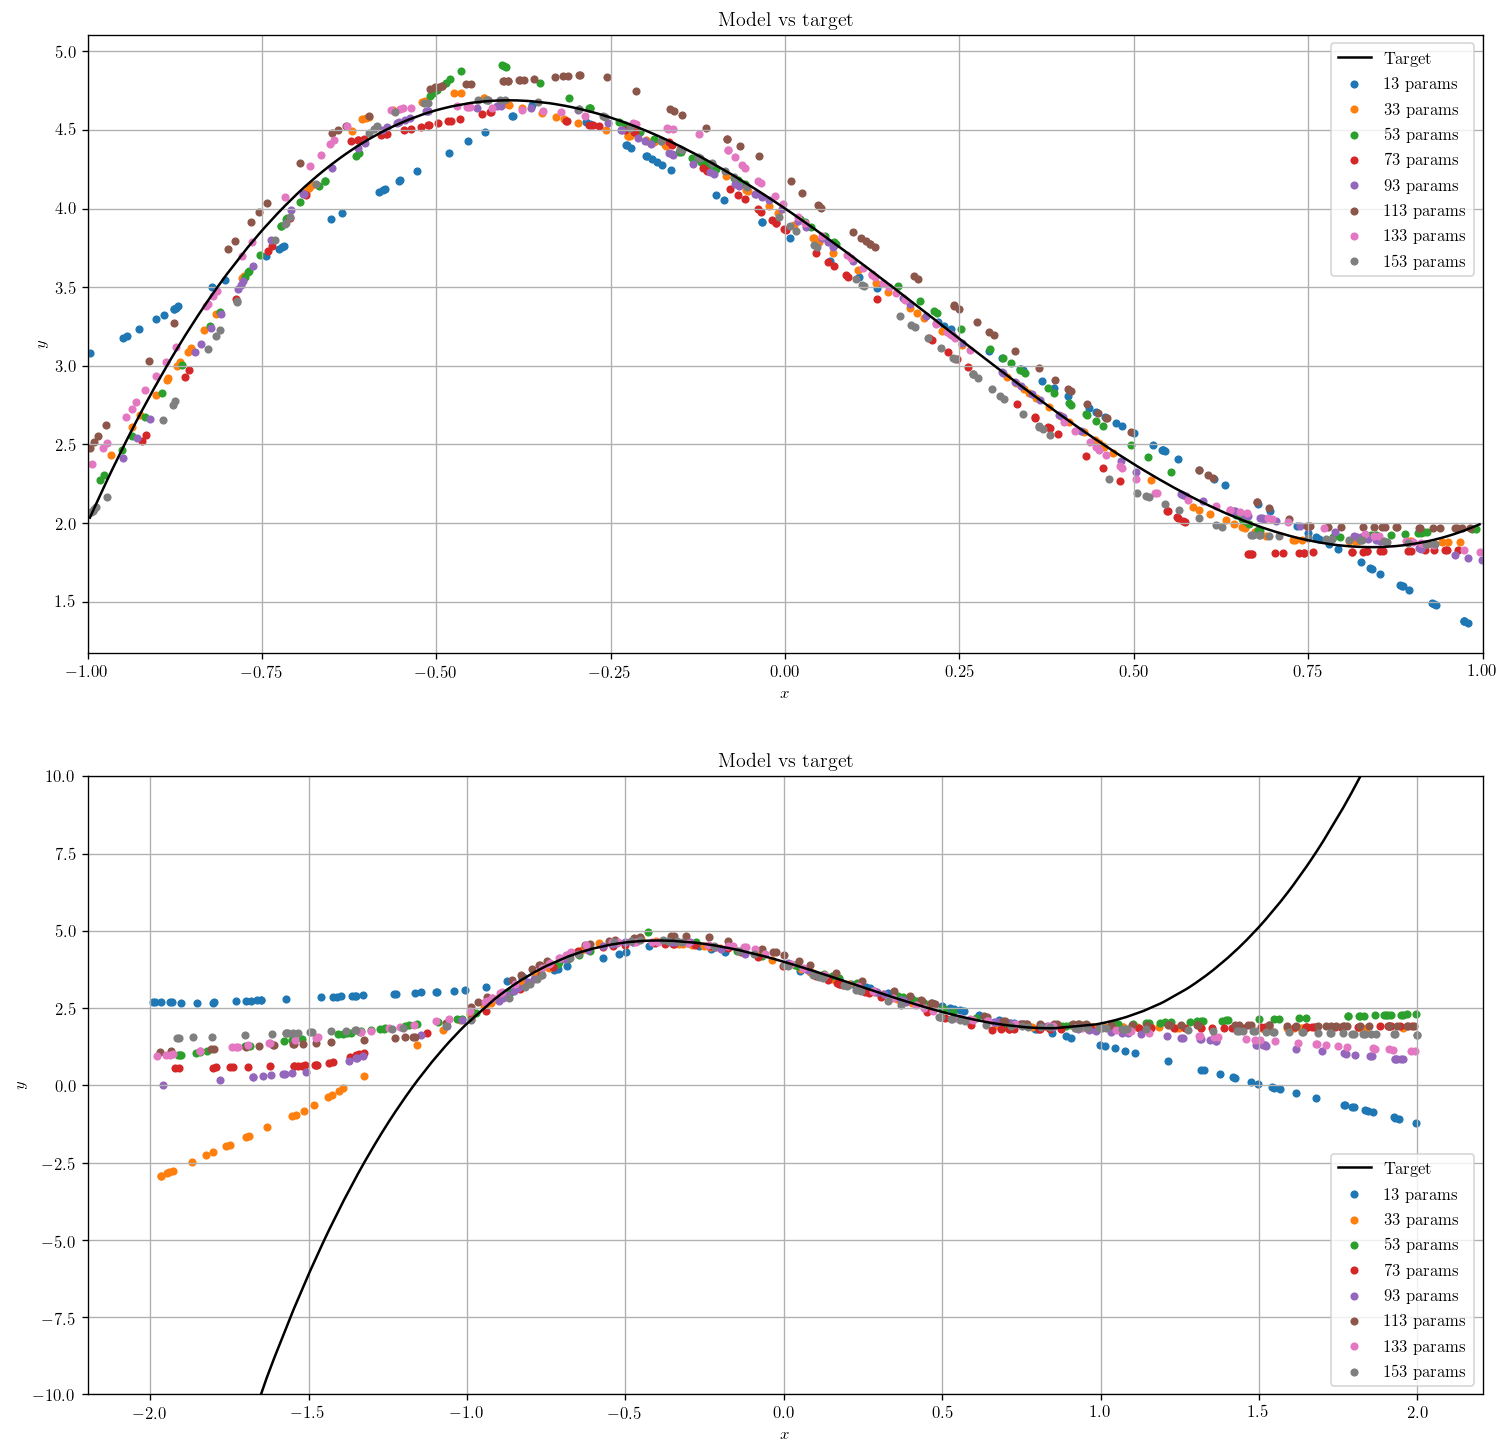

In [203]:
fig, (ax1,ax2)=plt.subplots(2,1, figsize=(15,15), dpi=120)

x_array = [np.random.uniform(-1, 1, 100) for i in range(len(model_array))]
y_array = [model_array[i].predict(x_array[i]) for i in range(len(model_array))]
x_out_array = [np.random.uniform(-2, 2, 100) for i in range(len(model_array))]
y_out_array = [model_array[i].predict(x_out_array[i]) for i in range(len(model_array))]

ax1.plot(x_valid, y_target, label="Target", color="black")
for i in range(len(model_array)):
    ax1.scatter(x_array[i], y_array[i], label=str(model_array[i].count_params())+" params", s=15)

ax1.set_title('Model vs target')
ax1.set_ylabel(r'$y$')
ax1.set_xlabel(r'$x$')
ax1.grid(True)
ax1.legend()
ax1.set_xlim(-1,1)

x_out_target = np.random.uniform(-2, 2, 200)
x_out_target.sort()
ax2.plot(x_out_target, f(x_out_target), label="Target", color="black")
ax2.set_ylim(-10,10)

for i in range(len(model_array)):
    ax2.scatter(x_out_array[i], y_out_array[i], label=str(model_array[i].count_params())+" params", s=15)

ax2.set_title('Model vs target')
ax2.set_ylabel(r'$y$')
ax2.set_xlabel(r'$x$')
ax2.grid(True)
ax2.legend()

plt.show()

### Modello 1: un solo layer

In [128]:
model1 = tf.keras.Sequential()
model1.add(Dense(25, input_shape=(1,),activation='relu'))
model1.add(LeakyReLU(alpha=0.1))
model1.add(Dense(1))

# compile the model choosing optimizer, loss and metrics objects
model1.compile(optimizer='sgd', loss='mse', metrics=['mse'])
model1.summary()

Model: "sequential_206"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1298 (Dense)           (None, 25)                50        
_________________________________________________________________
leaky_re_lu_215 (LeakyReLU)  (None, 25)                0         
_________________________________________________________________
dense_1299 (Dense)           (None, 1)                 26        
Total params: 76
Trainable params: 76
Non-trainable params: 0
_________________________________________________________________


In [129]:
history1 = model1.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=30,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

Train on 3000 samples, validate on 300 samples
Epoch 1/30
3000/3000 [==============================] - 1s 269us/sample - loss: 2.1558 - mse: 2.1558 - val_loss: 0.7959 - val_mse: 0.7959
Epoch 2/30
3000/3000 [==============================] - 0s 74us/sample - loss: 0.7238 - mse: 0.7238 - val_loss: 0.7170 - val_mse: 0.7170
Epoch 3/30
3000/3000 [==============================] - 0s 78us/sample - loss: 0.6660 - mse: 0.6660 - val_loss: 0.6656 - val_mse: 0.6656
Epoch 4/30
3000/3000 [==============================] - 0s 100us/sample - loss: 0.6171 - mse: 0.6171 - val_loss: 0.6229 - val_mse: 0.6229
Epoch 5/30
3000/3000 [==============================] - 0s 72us/sample - loss: 0.5730 - mse: 0.5730 - val_loss: 0.5717 - val_mse: 0.5717
Epoch 6/30
3000/3000 [==============================] - 0s 71us/sample - loss: 0.5324 - mse: 0.5324 - val_loss: 0.5368 - val_mse: 0.5368
Epoch 7/30
3000/3000 [==============================] - 0s 70us/sample - loss: 0.4984 - mse: 0.4984 - val_loss: 0.4976 - val_mse:

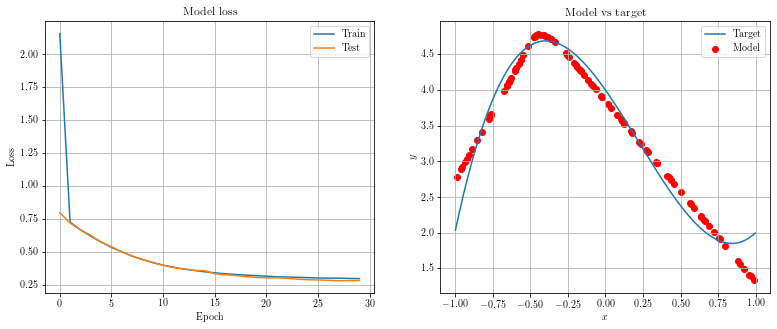

Final training data loss:  0.295007402698199
Final validation data loss:  0.2801164929072062


In [130]:
# Plot training & validation loss values
fig, (ax1,ax2)=plt.subplots(1,2, figsize=(13,5))
ax1.plot(history1.history['loss'])
ax1.plot(history1.history['val_loss'])
ax1.set_title('Model loss')
ax1.set_ylabel('Loss')
ax1.set_xlabel('Epoch')
ax1.grid(True)
ax1.legend(['Train', 'Test'], loc='best')

x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model1.predict(x_predicted)
ax2.scatter(x_predicted, y_predicted,color='r', label="Model")
ax2.plot(x_valid, y_target, label="Target")
ax2.set_title('Model vs target')
ax2.set_ylabel(r'$y$')
ax2.set_xlabel(r'$x$')
ax2.grid(True)
ax2.legend()

plt.show()

print("Final training data loss: ", history1.history['loss'][-1])
print("Final validation data loss: ", history1.history['val_loss'][-1])

### Modello 2: pochi neuroni per layer, tanti layer

In [137]:
model2 = tf.keras.Sequential()
model2.add(Dense(3, input_shape=(1,)))
model2.add(LeakyReLU(alpha=0.1))
for i in range(5):
    model2.add(Dense(3))
    model2.add(LeakyReLU(alpha=0.1))

model2.add(Dense(1))

# compile the model choosing optimizer, loss and metrics objects
model2.compile(optimizer='sgd', loss='mse', metrics=['mse'])
model2.summary()

Model: "sequential_212"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1354 (Dense)           (None, 3)                 6         
_________________________________________________________________
leaky_re_lu_265 (LeakyReLU)  (None, 3)                 0         
_________________________________________________________________
dense_1355 (Dense)           (None, 3)                 12        
_________________________________________________________________
leaky_re_lu_266 (LeakyReLU)  (None, 3)                 0         
_________________________________________________________________
dense_1356 (Dense)           (None, 3)                 12        
_________________________________________________________________
leaky_re_lu_267 (LeakyReLU)  (None, 3)                 0         
_________________________________________________________________
dense_1357 (Dense)           (None, 3)              

In [146]:
history2 = model2.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=30,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

Train on 3000 samples, validate on 300 samples
Epoch 1/30
3000/3000 [==============================] - 0s 117us/sample - loss: 0.2695 - mse: 0.2695 - val_loss: 0.3553 - val_mse: 0.3553
Epoch 2/30
3000/3000 [==============================] - 0s 99us/sample - loss: 0.2760 - mse: 0.2760 - val_loss: 0.2365 - val_mse: 0.2365
Epoch 3/30
3000/3000 [==============================] - 0s 92us/sample - loss: 0.2881 - mse: 0.2881 - val_loss: 0.3137 - val_mse: 0.3137
Epoch 4/30
3000/3000 [==============================] - 0s 104us/sample - loss: 0.2760 - mse: 0.2760 - val_loss: 0.2500 - val_mse: 0.2500
Epoch 5/30
3000/3000 [==============================] - 0s 99us/sample - loss: 0.2687 - mse: 0.2687 - val_loss: 0.3467 - val_mse: 0.3467
Epoch 6/30
3000/3000 [==============================] - 0s 89us/sample - loss: 0.2832 - mse: 0.2832 - val_loss: 0.2397 - val_mse: 0.2397
Epoch 7/30
3000/3000 [==============================] - 0s 127us/sample - loss: 0.2748 - mse: 0.2748 - val_loss: 0.2453 - val_mse

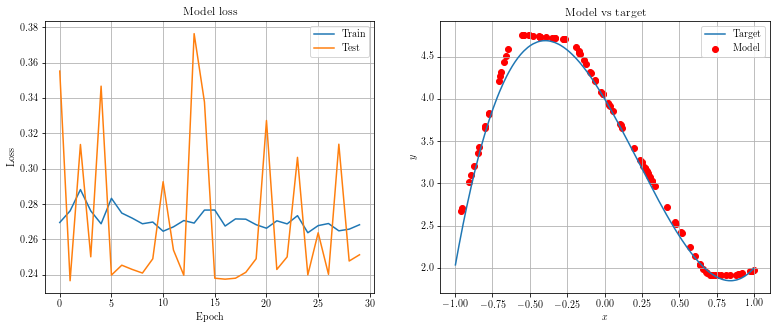

Final training data loss:  0.2681997234026591
Final validation data loss:  0.2511852648854256


In [147]:
# Plot training & validation loss values
fig, (ax1,ax2)=plt.subplots(1,2, figsize=(13,5))
ax1.plot(history2.history['loss'])
ax1.plot(history2.history['val_loss'])
ax1.set_title('Model loss')
ax1.set_ylabel('Loss')
ax1.set_xlabel('Epoch')
ax1.grid(True)
ax1.legend(['Train', 'Test'], loc='best')

x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model2.predict(x_predicted)
ax2.scatter(x_predicted, y_predicted,color='r', label="Model")
ax2.plot(x_valid, y_target, label="Target")
ax2.set_title('Model vs target')
ax2.set_ylabel(r'$y$')
ax2.set_xlabel(r'$x$')
ax2.grid(True)
ax2.legend()

plt.show()

print("Final training data loss: ", history2.history['loss'][-1])
print("Final validation data loss: ", history2.history['val_loss'][-1])

### Modello 3: compromesso tra modello 2 e modello 1

In [149]:
model3 = tf.keras.Sequential()
model3.add(Dense(5, input_shape=(1,)))
model3.add(LeakyReLU(alpha=0.1))
model3.add(Dense(5))
model3.add(LeakyReLU(alpha=0.1))
model3.add(Dense(5))
model3.add(LeakyReLU(alpha=0.1))
model3.add(Dense(1))

# compile the model choosing optimizer, loss and metrics objects
model3.compile(optimizer='sgd', loss='mse', metrics=['mse'])
model3.summary()

Model: "sequential_217"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1377 (Dense)           (None, 5)                 10        
_________________________________________________________________
leaky_re_lu_274 (LeakyReLU)  (None, 5)                 0         
_________________________________________________________________
dense_1378 (Dense)           (None, 5)                 30        
_________________________________________________________________
leaky_re_lu_275 (LeakyReLU)  (None, 5)                 0         
_________________________________________________________________
dense_1379 (Dense)           (None, 5)                 30        
_________________________________________________________________
leaky_re_lu_276 (LeakyReLU)  (None, 5)                 0         
_________________________________________________________________
dense_1380 (Dense)           (None, 1)              

In [150]:
history3 = model3.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=30,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

Train on 3000 samples, validate on 300 samples
Epoch 1/30
3000/3000 [==============================] - 1s 373us/sample - loss: 4.1255 - mse: 4.1255 - val_loss: 1.5472 - val_mse: 1.5472
Epoch 2/30
3000/3000 [==============================] - 0s 102us/sample - loss: 1.3350 - mse: 1.3350 - val_loss: 1.2561 - val_mse: 1.2561
Epoch 3/30
3000/3000 [==============================] - 0s 82us/sample - loss: 0.9980 - mse: 0.9980 - val_loss: 0.7290 - val_mse: 0.7290
Epoch 4/30
3000/3000 [==============================] - 0s 80us/sample - loss: 0.5962 - mse: 0.5962 - val_loss: 0.5790 - val_mse: 0.5790
Epoch 5/30
3000/3000 [==============================] - 0s 100us/sample - loss: 0.5372 - mse: 0.5372 - val_loss: 0.5549 - val_mse: 0.5549
Epoch 6/30
3000/3000 [==============================] - 0s 75us/sample - loss: 0.5235 - mse: 0.5235 - val_loss: 0.5469 - val_mse: 0.5469
Epoch 7/30
3000/3000 [==============================] - 0s 84us/sample - loss: 0.5167 - mse: 0.5167 - val_loss: 0.5417 - val_mse

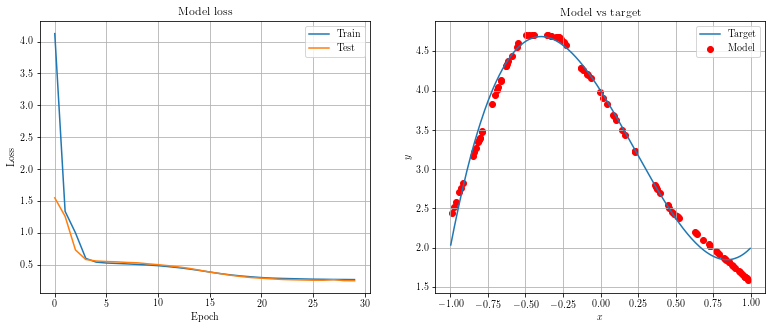

Final training data loss:  0.26348676180839536
Final validation data loss:  0.24524197200934092


In [151]:
# Plot training & validation loss values
fig, (ax1,ax2)=plt.subplots(1,2, figsize=(13,5))
ax1.plot(history3.history['loss'])
ax1.plot(history3.history['val_loss'])
ax1.set_title('Model loss')
ax1.set_ylabel('Loss')
ax1.set_xlabel('Epoch')
ax1.grid(True)
ax1.legend(['Train', 'Test'], loc='best')

x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model3.predict(x_predicted)
ax2.scatter(x_predicted, y_predicted,color='r', label="Model")
ax2.plot(x_valid, y_target, label="Target")
ax2.set_title('Model vs target')
ax2.set_ylabel(r'$y$')
ax2.set_xlabel(r'$x$')
ax2.grid(True)
ax2.legend()

plt.show()

print("Final training data loss: ", history3.history['loss'][-1])
print("Final validation data loss: ", history3.history['val_loss'][-1])

### Modello 4 - Tangente iperbolica

In [166]:
model4 = tf.keras.Sequential()
model4.add(Dense(5, input_shape=(1,), activation="tanh"))
model4.add(Dense(5, activation="tanh"))
model4.add(Dense(5, activation="tanh"))
model4.add(Dense(1))

# compile the model choosing optimizer, loss and metrics objects
model4.compile(optimizer='sgd', loss='mse', metrics=['mse'])
model4.summary()

Model: "sequential_225"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1407 (Dense)           (None, 5)                 10        
_________________________________________________________________
dense_1408 (Dense)           (None, 5)                 30        
_________________________________________________________________
dense_1409 (Dense)           (None, 5)                 30        
_________________________________________________________________
dense_1410 (Dense)           (None, 1)                 6         
Total params: 76
Trainable params: 76
Non-trainable params: 0
_________________________________________________________________


In [167]:
history4 = model4.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=30,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

Train on 3000 samples, validate on 300 samples
Epoch 1/30
3000/3000 [==============================] - 1s 350us/sample - loss: 1.1702 - mse: 1.1702 - val_loss: 0.6222 - val_mse: 0.6222
Epoch 2/30
3000/3000 [==============================] - 0s 76us/sample - loss: 0.5953 - mse: 0.5953 - val_loss: 0.6072 - val_mse: 0.6072
Epoch 3/30
3000/3000 [==============================] - 0s 74us/sample - loss: 0.5804 - mse: 0.5804 - val_loss: 0.5888 - val_mse: 0.5888
Epoch 4/30
3000/3000 [==============================] - 0s 77us/sample - loss: 0.5571 - mse: 0.5571 - val_loss: 0.5646 - val_mse: 0.5646
Epoch 5/30
3000/3000 [==============================] - 0s 70us/sample - loss: 0.5273 - mse: 0.5273 - val_loss: 0.5246 - val_mse: 0.5246
Epoch 6/30
3000/3000 [==============================] - 0s 76us/sample - loss: 0.4797 - mse: 0.4797 - val_loss: 0.4732 - val_mse: 0.4732
Epoch 7/30
3000/3000 [==============================] - 0s 101us/sample - loss: 0.4259 - mse: 0.4259 - val_loss: 0.4131 - val_mse:

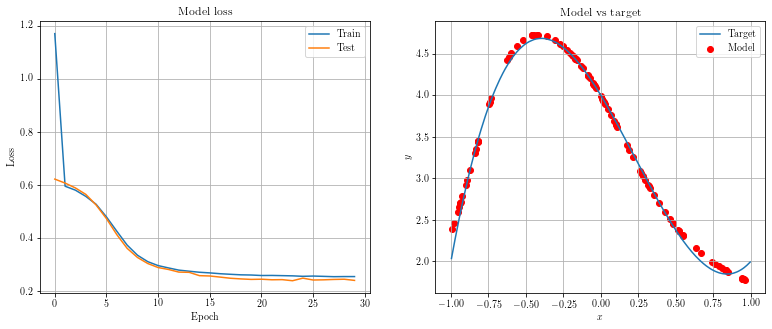

Final training data loss:  0.2549140738050143
Final validation data loss:  0.24050312916437785


In [168]:
# Plot training & validation loss values
fig, (ax1,ax2)=plt.subplots(1,2, figsize=(13,5))
ax1.plot(history4.history['loss'])
ax1.plot(history4.history['val_loss'])
ax1.set_title('Model loss')
ax1.set_ylabel('Loss')
ax1.set_xlabel('Epoch')
ax1.grid(True)
ax1.legend(['Train', 'Test'], loc='best')

x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model4.predict(x_predicted)
ax2.scatter(x_predicted, y_predicted,color='r', label="Model")
ax2.plot(x_valid, y_target, label="Target")
ax2.set_title('Model vs target')
ax2.set_ylabel(r'$y$')
ax2.set_xlabel(r'$x$')
ax2.grid(True)
ax2.legend()

plt.show()

print("Final training data loss: ", history4.history['loss'][-1])
print("Final validation data loss: ", history4.history['val_loss'][-1])

### Modello 5 - Adam optimizer

In [186]:
model5 = tf.keras.Sequential()
model5.add(Dense(5, input_shape=(1,), activation="tanh"))
model5.add(Dense(5, activation="tanh"))
model5.add(Dense(5, activation="tanh"))
model5.add(Dense(1))

# compile the model choosing optimizer, loss and metrics objects
model5.compile(optimizer='adam', loss='mse', metrics=['mse'])
model5.summary()

Model: "sequential_233"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1439 (Dense)           (None, 5)                 10        
_________________________________________________________________
dense_1440 (Dense)           (None, 5)                 30        
_________________________________________________________________
dense_1441 (Dense)           (None, 5)                 30        
_________________________________________________________________
dense_1442 (Dense)           (None, 1)                 6         
Total params: 76
Trainable params: 76
Non-trainable params: 0
_________________________________________________________________


In [187]:
history5 = model5.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=30,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

Train on 3000 samples, validate on 300 samples
Epoch 1/30
3000/3000 [==============================] - 1s 394us/sample - loss: 9.5999 - mse: 9.5999 - val_loss: 6.0121 - val_mse: 6.0121
Epoch 2/30
3000/3000 [==============================] - 0s 99us/sample - loss: 3.2223 - mse: 3.2223 - val_loss: 1.5355 - val_mse: 1.5355
Epoch 3/30
3000/3000 [==============================] - 0s 103us/sample - loss: 1.0312 - mse: 1.0312 - val_loss: 0.7997 - val_mse: 0.7997
Epoch 4/30
3000/3000 [==============================] - 0s 90us/sample - loss: 0.6885 - mse: 0.6885 - val_loss: 0.6644 - val_mse: 0.6644
Epoch 5/30
3000/3000 [==============================] - 0s 92us/sample - loss: 0.6232 - mse: 0.6232 - val_loss: 0.6372 - val_mse: 0.6372
Epoch 6/30
3000/3000 [==============================] - 0s 111us/sample - loss: 0.6110 - mse: 0.6110 - val_loss: 0.6297 - val_mse: 0.6297
Epoch 7/30
3000/3000 [==============================] - 0s 88us/sample - loss: 0.6058 - mse: 0.6058 - val_loss: 0.6251 - val_mse

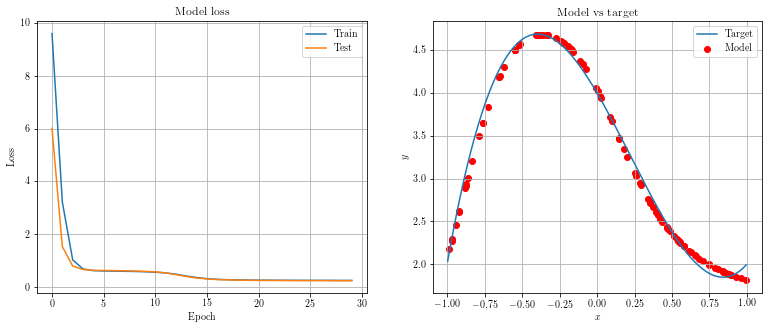

Final training data loss:  0.25365796995162965
Final validation data loss:  0.24096072395642598


In [188]:
# Plot training & validation loss values
fig, (ax1,ax2)=plt.subplots(1,2, figsize=(13,5))
ax1.plot(history5.history['loss'])
ax1.plot(history5.history['val_loss'])
ax1.set_title('Model loss')
ax1.set_ylabel('Loss')
ax1.set_xlabel('Epoch')
ax1.grid(True)
ax1.legend(['Train', 'Test'], loc='best')

x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model5.predict(x_predicted)
ax2.scatter(x_predicted, y_predicted,color='r', label="Model")
ax2.plot(x_valid, y_target, label="Target")
ax2.set_title('Model vs target')
ax2.set_ylabel(r'$y$')
ax2.set_xlabel(r'$x$')
ax2.grid(True)
ax2.legend()

plt.show()

print("Final training data loss: ", history5.history['loss'][-1])
print("Final validation data loss: ", history5.history['val_loss'][-1])

### Modello 6 - Mean absolute error

In [189]:
model6 = tf.keras.Sequential()
model6.add(Dense(5, input_shape=(1,), activation="tanh"))
model6.add(Dense(5, activation="tanh"))
model6.add(Dense(5, activation="tanh"))
model6.add(Dense(1))

# compile the model choosing optimizer, loss and metrics objects
model6.compile(optimizer='sgd', loss='mae', metrics=['mse'])
model6.summary()

Model: "sequential_234"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1443 (Dense)           (None, 5)                 10        
_________________________________________________________________
dense_1444 (Dense)           (None, 5)                 30        
_________________________________________________________________
dense_1445 (Dense)           (None, 5)                 30        
_________________________________________________________________
dense_1446 (Dense)           (None, 1)                 6         
Total params: 76
Trainable params: 76
Non-trainable params: 0
_________________________________________________________________


In [191]:
history6 = model6.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=30,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

Train on 3000 samples, validate on 300 samples
Epoch 1/30
3000/3000 [==============================] - 0s 109us/sample - loss: 0.4090 - mse: 0.2606 - val_loss: 0.4069 - val_mse: 0.2606
Epoch 2/30
3000/3000 [==============================] - 0s 97us/sample - loss: 0.4080 - mse: 0.2592 - val_loss: 0.3921 - val_mse: 0.2441
Epoch 3/30
3000/3000 [==============================] - 0s 102us/sample - loss: 0.4057 - mse: 0.2575 - val_loss: 0.3930 - val_mse: 0.2448
Epoch 4/30
3000/3000 [==============================] - 0s 86us/sample - loss: 0.4055 - mse: 0.2561 - val_loss: 0.3952 - val_mse: 0.2485
Epoch 5/30
3000/3000 [==============================] - 0s 86us/sample - loss: 0.4031 - mse: 0.2560 - val_loss: 0.4029 - val_mse: 0.2575
Epoch 6/30
3000/3000 [==============================] - 0s 76us/sample - loss: 0.4045 - mse: 0.2550 - val_loss: 0.3929 - val_mse: 0.2446
Epoch 7/30
3000/3000 [==============================] - 0s 81us/sample - loss: 0.4042 - mse: 0.2548 - val_loss: 0.3866 - val_mse:

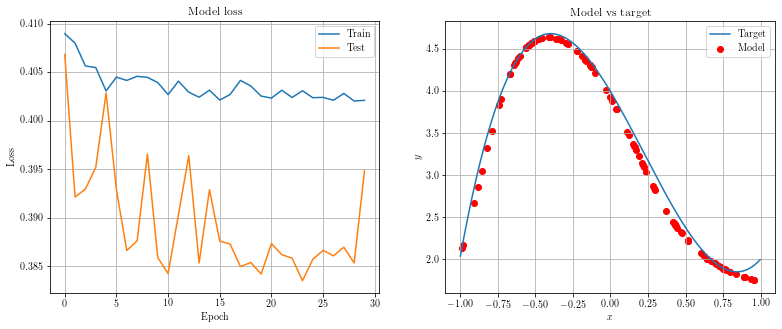

Final training data loss:  0.4021161556243896
Final validation data loss:  0.39482802510261533
Final validation data loss (mse):  0.24751462


In [192]:
# Plot training & validation loss values
fig, (ax1,ax2)=plt.subplots(1,2, figsize=(13,5))
ax1.plot(history6.history['loss'])
ax1.plot(history6.history['val_loss'])
ax1.set_title('Model loss')
ax1.set_ylabel('Loss')
ax1.set_xlabel('Epoch')
ax1.grid(True)
ax1.legend(['Train', 'Test'], loc='best')

x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model6.predict(x_predicted)
ax2.scatter(x_predicted, y_predicted,color='r', label="Model")
ax2.plot(x_valid, y_target, label="Target")
ax2.set_title('Model vs target')
ax2.set_ylabel(r'$y$')
ax2.set_xlabel(r'$x$')
ax2.grid(True)
ax2.legend()

plt.show()

print("Final training data loss: ", history6.history['loss'][-1])
print("Final validation data loss: ", history6.history['val_loss'][-1])
print("Final validation data loss (mse): ", history6.history['val_mse'][-1])

## Riassunto

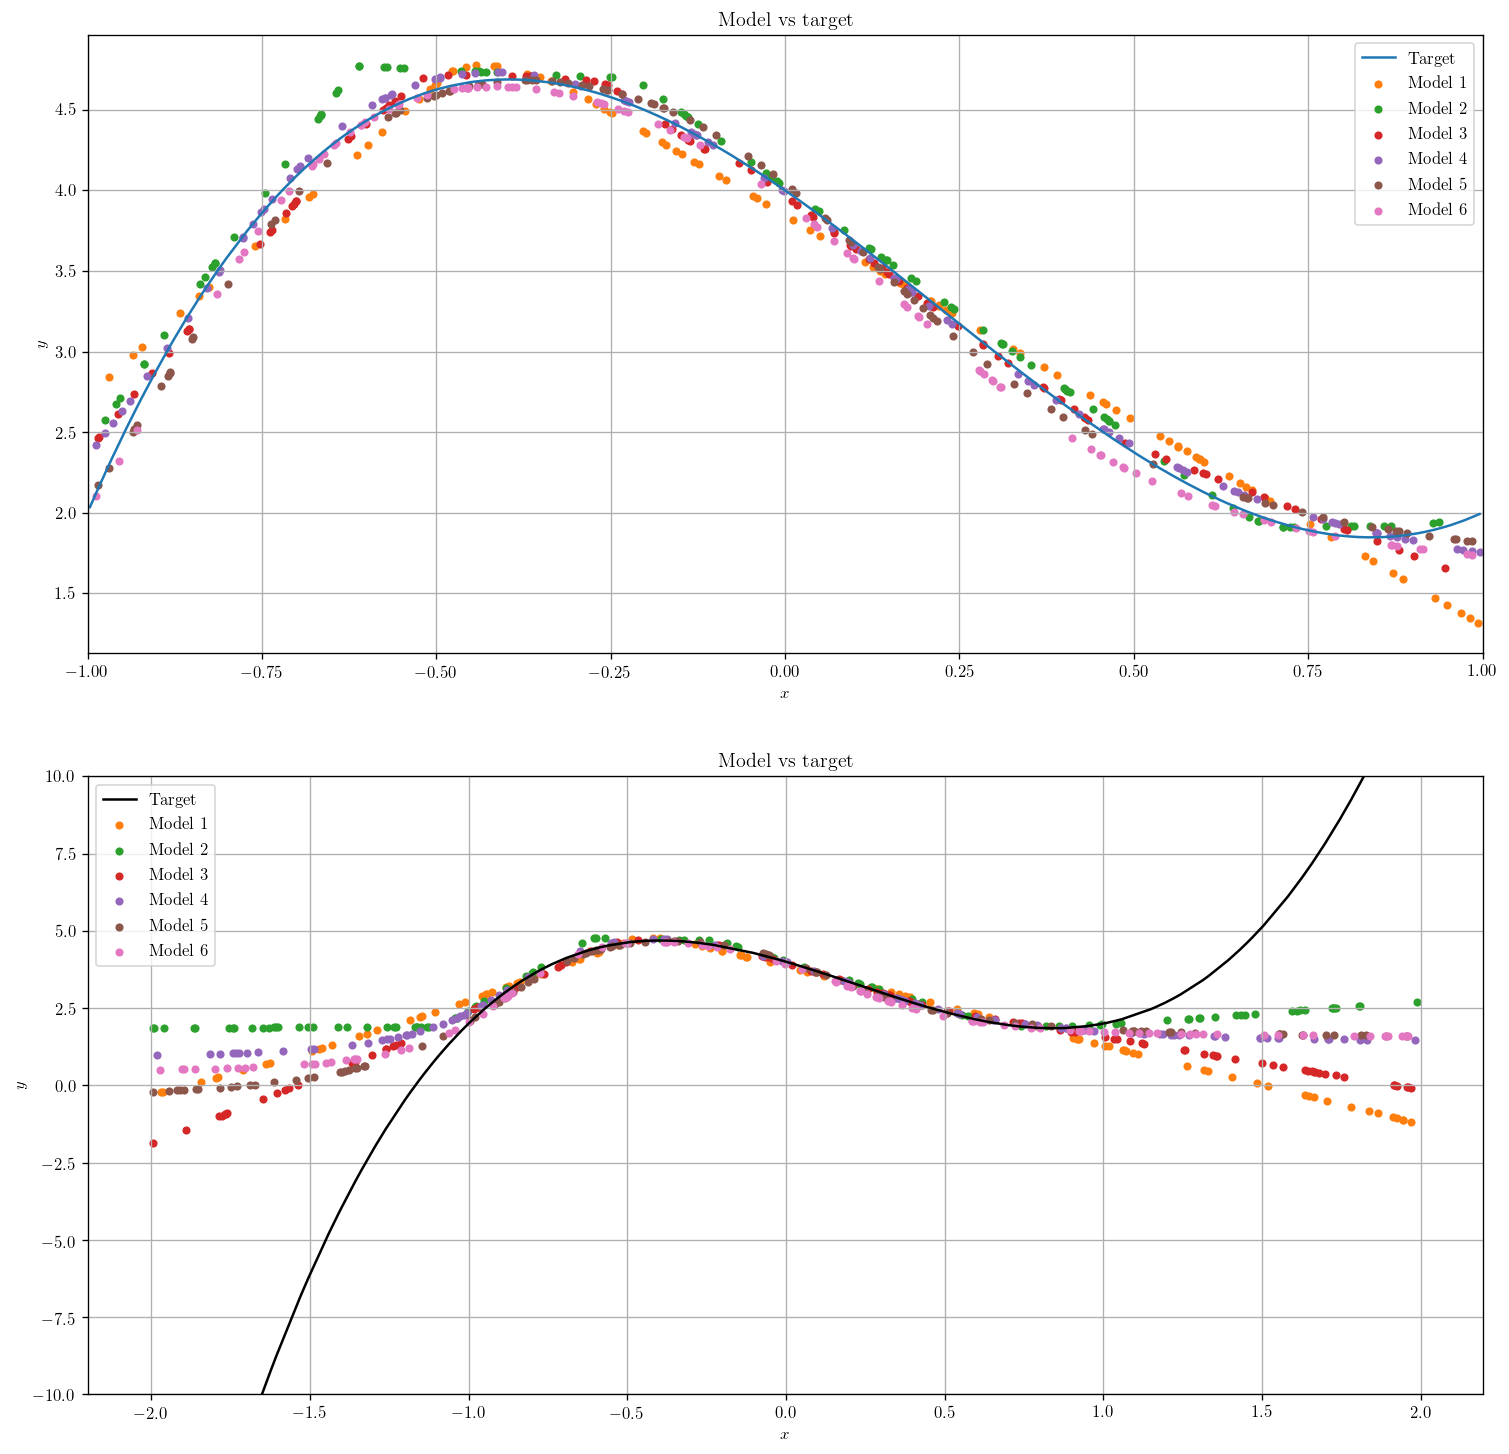

In [204]:
fig, (ax1,ax2)=plt.subplots(2,1, figsize=(15,15), dpi=120)

x1 = np.random.uniform(-1, 1, 100)
x2 = np.random.uniform(-1, 1, 100)
x3 = np.random.uniform(-1, 1, 100)
x4 = np.random.uniform(-1, 1, 100)
x5 = np.random.uniform(-1, 1, 100)
x6 = np.random.uniform(-1, 1, 100)
y1 = model1.predict(x1)
y2 = model2.predict(x2)
y3 = model3.predict(x3)
y4 = model4.predict(x4)
y5 = model5.predict(x5)
y6 = model6.predict(x6)

x1out = np.random.uniform(-2, 2, 100)
x2out = np.random.uniform(-2, 2, 100)
x3out = np.random.uniform(-2, 2, 100)
x4out = np.random.uniform(-2, 2, 100)
x5out = np.random.uniform(-2, 2, 100)
x6out = np.random.uniform(-2, 2, 100)
y1out = model1.predict(x1out)
y2out = model2.predict(x2out)
y3out = model3.predict(x3out)
y4out = model4.predict(x4out)
y5out = model5.predict(x5out)
y6out = model6.predict(x6out)

ax1.plot(x_valid, y_target, label="Target")
ax1.scatter(x1, y1, label="Model 1", s=15, color="C1")
ax1.scatter(x2, y2, label="Model 2", s=15, color="C2")
ax1.scatter(x3, y3, label="Model 3", s=15, color="C3")
ax1.scatter(x4, y4, label="Model 4", s=15, color="C4")
ax1.scatter(x5, y5, label="Model 5", s=15, color="C5")
ax1.scatter(x6, y6, label="Model 6", s=15, color="C6")
ax1.set_title('Model vs target')
ax1.set_ylabel(r'$y$')
ax1.set_xlabel(r'$x$')
ax1.grid(True)
ax1.legend()
ax1.set_xlim(-1,1)

x_out_target = np.random.uniform(-2, 2, 200)
x_out_target.sort()
ax2.plot(x_out_target, f(x_out_target), label="Target", color="black")
ax2.set_ylim(-10,10)
ax2.scatter(x1out, y1out, label="Model 1", s=15, color="C1")
ax2.scatter(x2out, y2out, label="Model 2", s=15, color="C2")
ax2.scatter(x3out, y3out, label="Model 3", s=15, color="C3")
ax2.scatter(x4out, y4out, label="Model 4", s=15, color="C4")
ax2.scatter(x5out, y5out, label="Model 5", s=15, color="C5")
ax2.scatter(x6out, y6out, label="Model 6", s=15, color="C6")


ax2.set_title('Model vs target')
ax2.set_ylabel(r'$y$')
ax2.set_xlabel(r'$x$')
ax2.grid(True)
ax2.legend()

plt.show()

Come si può notare, al di fuori dell'intervallo $[-1,1]$ il fit non è più accurato.

Confronto ora le performance dei vari modelli. Per includere nel confronto anche il modello 6 ovviamente non bisogna considerare il MAE (utilizzato come ottimizzatore), ma il MSE (utilizzato come metrica).

In [199]:
score1valid = model1.evaluate(x_valid, y_valid, batch_size=32, verbose=0)
score2valid = model2.evaluate(x_valid, y_valid, batch_size=32, verbose=0)
score3valid = model3.evaluate(x_valid, y_valid, batch_size=32, verbose=0)
score4valid = model4.evaluate(x_valid, y_valid, batch_size=32, verbose=0)
score5valid = model5.evaluate(x_valid, y_valid, batch_size=32, verbose=0)
score6valid = model6.evaluate(x_valid, y_valid, batch_size=32, verbose=0)

score1target = model1.evaluate(x_valid, y_target, batch_size=32, verbose=0)
score2target = model2.evaluate(x_valid, y_target, batch_size=32, verbose=0)
score3target = model3.evaluate(x_valid, y_target, batch_size=32, verbose=0)
score4target = model4.evaluate(x_valid, y_target, batch_size=32, verbose=0)
score5target = model5.evaluate(x_valid, y_target, batch_size=32, verbose=0)
score6target = model6.evaluate(x_valid, y_target, batch_size=32, verbose=0)

# Model 1: few layers, many neurons per layers
# Model 2: oppposite
# Model 3: compromise
# Model 4: Hyperbolic tangent
# Model 5: Hyperbolic tangent+adam optimizer
# Model 6: Hyperbolic tangent+Mae

print("VALIDATION DATA LOSSES")
print('Model 1:', score1valid[0])
print('Model 2:', score2valid[0])
print('Model 3:', score3valid[0])
print('Model 4:', score4valid[0])
print('Model 5:', score5valid[0])
print('Model 6:', score6valid[1])

print("TARGET DATA LOSSES")
print('Model 1:', score1target[0])
print('Model 2', score2target[0])
print('Model 3:', score3target[0])
print('Model 4:', score4target[0])
print('Model 5:', score5target[0])
print('Model 6:', score6target[1])

VALIDATION DATA LOSSES
Model 1: 0.2801164929072062
Model 2: 0.2511852648854256
Model 3: 0.24524197200934092
Model 4: 0.24050312916437785
Model 5: 0.24096072395642598
Model 6: 0.24751462
TARGET DATA LOSSES
Model 1: 0.04000735301524401
Model 2 0.016433872858372826
Model 3: 0.010631440300494432
Model 4: 0.00503180877926449
Model 5: 0.006443914913882812
Model 6: 0.010766967


Si può innanzitutto notare come l'errore sui dati di validazione sia nei dintorni di $\sigma^2=0.25$ in tutti i casi, come ragionevole attendersi dato che essi sono stati estratti da una gaussiana con $\sigma=0.5$.

I migliori risultati sembrano ottenersi con il modello 4 (tangente iperbolica come funzione di attivazione) e il modello 5 (tangente iperbolica + Adam optimizer). In particolare, è significativamente migliore l'accordo con i dati esatti rispetto agli altri casi. Se dovessi ipotizzare la ragione di questo risultato, direi che è perché la tangente iperbolica è una funzione liscia, mentre la Leaky ReLU no; questo mi darebbe l'idea che possa meglio approssimare una funzione liscia con massimi e minimi come un polinomio, soprattutto se non si usano tanti neuroni (ovviamente si tratta di una mia semplice suggestione). In effetti, modelli in cui è stata utilizzata la funzione di attivazione Leaky ReLU appaiono più "segmentati" rispetto a quelli in cui, invece, è stata considerata la tangente iperbolica. In particolare, utilizzando la tangente iperbolica sembra che si riescano ad approssimare meglio le zone dove la derivata del polinomio cambia più velocemente (quindi le zone dove la derivata seconda è maggiore in modulo, ossia le zone corrispondenti a massimi e minimi minimi).

I risultati peggiori (sia per quanto riguarda l'errore di validazione sia per quanto riguarda il confronto con i dati veri), invece, si ottengono con il modello 1 (pochi layer, tanti neuroni per layer) e con il modello 2 (tanti layer, pochi neuroni per layer). Questo sembra indicare che per raggiungere buoni risultati siano importanti sia la profondità che la larghezza della rete neurale.

